<a href="https://colab.research.google.com/github/rinato/notchfilter/blob/main/colab_notchfilter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text(0, 0.5, 'Amplitude')

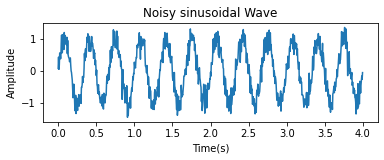

In [ ]:
#@title
import matplotlib.pyplot as plt
import numpy as np
from math import pi
import scipy.fftpack as sf
import scipy.signal as sig

plt.close('all')

# Generate a signal
Fs = 200;
t = 4;
n = np.arange(0, t, 1/Fs)
f = 3;
x = np.sin(2*pi*f*n)

# Generate a noise
y = np.random.normal(0, 0.2, np.size(x));
x = x +  y;

plt.figure(1)
plt.subplot(2,1,1)
plt.plot(n,x);
plt.title('Noisy sinusoidal Wave')
plt.xlabel('Time(s)'); plt.ylabel('Amplitude')

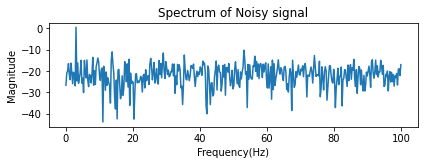

In [ ]:
X_f = abs(sf.fft(x))
l = np.size(x)
fr = ((Fs/2)*np.linspace(0,1,int(l/2)))
xl_m = (2/l)*abs(X_f[0:np.size(fr)]);

plt.subplot(2,1,2)
plt.plot(fr,20*np.log10(xl_m)); plt.title('Spectrum of Noisy signal')
plt.xlabel('Frequency(Hz)'); plt.ylabel('Magnitude')
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in multiply
  
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


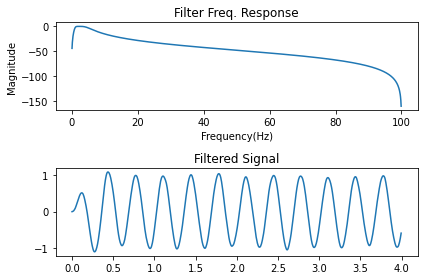

In [ ]:
# Create a BPF
o = 2;
fc = np.array([1,5])
wc = 2*fc/Fs;
[b,a] = sig.butter(o, wc, btype = 'bandpass')

#filter response
[W,h] = sig.freqz(b,a, worN = 1024)

W = Fs* W/(2*pi)

plt.figure(2)
plt.subplot(2,1,1)
plt.plot(W, 20*np.log10(h)); plt.title('Filter Freq. Response')
plt.xlabel('Frequency(Hz)'); plt.ylabel('Magnitude')

# Filter signal
x_filt = sig.lfilter(b,a, x)

plt.subplot(2,1,2)
plt.plot(n,x_filt); plt.title('Filtered Signal')
plt.tight_layout();
